### Basic Ray Tutorial and Deep Q Learning

This tutorial focuses on the cart-pole problem. A cart has a pole fixed with a movable lever in the middle of the cart. The cart slides along a frictionless surface. The goal is to keep the pole upright at all times. The test is how far back and forth the cart can move in order to prevent the pole from falling. The tutorial has been modified heavily so that it (i) runs in a jupyter notebook, (ii) demonstrates full capabilities of ray, and ray tune and (iii) breaks down the components of a RL project along with enhanced explainations of the code. We may modify this tutorial further to solve a different problem.

In the second part of the tutorial, we demonstrate how to create a custom reinforcement learning environment with the problem space of a robot walking down a corridor.

#### References:

Barto, A. G., Sutton, R. S. and Anderson, C. (1983), ‘Neuron-like adaptive elements that can solve difficult learning control problems’, IEEE Transactions on Systems, 5, Man, and Cybernetics 13, 834–846

Tune: A Research Platform for Distributed Model Selection and Training, Liaw, Richard and Liang, Eric and Nishihara, Robert and Moritz, Philipp and Gonzalez, Joseph E and Stoica, Ion, arXiv preprint arXiv:1807.05118}, 2018

Ray RLLib Documentation: [Ray RLLib Documentation](https://docs.ray.io/en/master/rllib.html)

Ray Tune Documentation: [Ray Tune Documentation](https://docs.ray.io/en/master/tune/index.html)

Mastering Reinforcement Learning with Python, Enes Bilgin, Packt Publishing, 2020 [Buy MRL with Python](https://www.amazon.com/Mastering-Reinforcement-Learning-Python-next-generation/dp/1838644148/?tag=meastus-200)

In [ ]:
!pip install --user ray==1.7

In [ ]:
! ray --version

In [ ]:
## if using Domino's ray, start ray this way

import ray
import os

if ray.is_initialized() == False:
   service_host = os.environ["RAY_HEAD_SERVICE_HOST"]
   service_port = os.environ["RAY_HEAD_SERVICE_PORT"]
   ray.util.connect(f"{service_host}:{service_port}")

In [ ]:
ray.nodes()

### What is Ray and what can it do?

In [ ]:
import time
import os
import ray


y = 1
object_ref = y

def add(x, a=1):
    if x == 'add':
        answer = a + 1
    else:
        answer = a
    time.sleep(5)
    print(answer)
    
number_add =add('add')
number_none =add('hello')
        
object_ids = []
st = time.time()
for x in range(2):
    x = x
    y_id = add('add')
    object_ids.append(y_id) # the object ids will print out
    
## getting the results to pass to another function
objects = object_ids
end = time.time()
print(str(end-st))

In [ ]:
import ray
import time

## creating remote objects

# Put an object in Ray's object store, get it out and run the function
# say want to add 10 million and after every million 5 seconds, total processing would be 50 seconds
# do this in ray, and have 10 ray workers, adding 1 million values each, after calculating 1 million each sleeps
# 5 seconds, then total processing takes less than six seconds
# iterations in learning 
# ml is already iterative, running partitions on each worker and at the distributed sequentially now paralellized
# call without ray and then with ray
# small amount of data, run and then kick off with same code but a larger data set, locally and in cloud test
# use 10 workers, each sleeps 2 seconds, and see the difference

#ray.init()

y = 1
object_ref = ray.put(y)

@ray.remote
def add(x, a=1):
    if x == 'add':
        answer = a + 1
    else:
        answer = a
    time.sleep(5)
    print(answer)
    
number_add = ray.get(add.remote('add'))
number_none = ray.get(add.remote('hello'))
        
object_ids = []
st = time.time()
for x in range(2):
    x = x
    y_id = add.remote('add')
    object_ids.append(y_id) # the object ids will print out
    
## getting the results to pass to another function
objects = ray.get(object_ids)
end = time.time()
print(str(end-st))

In [ ]:
def return_multiple():
    time.sleep(5)
    return 1, 2, 3

st = time.time()
a, b, c = return_multiple()
print(a,b,c)
end = time.time()
print(str(end-st))

In [ ]:
@ray.remote(num_returns=3)
def return_multiple():
    time.sleep(5)
    return 1, 2, 3


a, b, c = return_multiple.remote()
st = time.time()
print(ray.get(a), ray.get(b), ray.get(c))
end = time.time()
print(str(end-st))

In [ ]:
### calculating pi
import random

NUM_SAMPLES = 15

#@ray.remote
def inside():
 x, y = random.random(), random.random()
 return x*x + y*y

st = time.time()
number = inside()
end = time.time()
print('The answer is: ', number)
print(str(end-st))

In [ ]:
import random

NUM_SAMPLES = 15

@ray.remote
def inside():
 x, y = random.random(), random.random()
 return x*x + y*y

st = time.time()
number = ray.get(inside.remote())
end = time.time()
print('The answer is: ', number)
print(str(end-st))

### The Cart Pole Problem

Training with hyperparameter tuning was traditionally very human-time intensive. With the Ray 'tune' tool, hyper-parameter tuning is automated.   

### Training a RL Model using RLLib

loreum ipsum

In [1]:
!pip install --user ray==1.7

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [ ]:
ray.shutdown()

In [11]:
import ray
from ray.rllib import agents
import pprint as pp
import gym

#ray.init()

config = {'gamma': 0.9,       
          'lr': 1e-2,
          'num_workers': 2,
          'train_batch_size': 1000,
          'model': {
              'fcnet_hiddens': [128, 128]
          }}
trainer = agents.dqn.DQNTrainer(env='CartPole-v0') #test vanilla deep q network
#trainer = agents.dqn.ApexTrainer(env='CartPole-v0') #test APEX optimized deep q network if using GPUs
results = trainer.train()
pp.pprint(results)

#ray.shutdown()

2021-10-20 15:24:18,067	WARNING deprecation.py:38 -- DeprecationWarning: `ReplayBuffer(size)` has been deprecated. Use `ReplayBuffer(capacity)` instead. This will raise an error in the future!
2021-10-20 15:24:18,069	WARNING util.py:57 -- Install gputil for GPU system monitoring.


{'agent_timesteps_total': 1000,
 'config': {'_fake_gpus': False,
            '_tf_policy_handles_more_than_one_loss': False,
            'action_space': None,
            'actions_in_input_normalized': False,
            'adam_epsilon': 1e-08,
            'batch_mode': 'truncate_episodes',
            'before_learn_on_batch': None,
            'buffer_size': 50000,
            'callbacks': <class 'ray.rllib.agents.callbacks.DefaultCallbacks'>,
            'clip_actions': False,
            'clip_rewards': None,
            'collect_metrics_timeout': 180,
            'compress_observations': False,
            'create_env_on_driver': False,
            'custom_eval_function': None,
            'custom_resources_per_worker': {},
            'double_q': True,
            'dueling': True,
            'eager_tracing': False,
            'env': 'CartPole-v0',
            'env_config': {},
            'env_task_fn': None,
            'evaluation_config': {'explore': False},
            'evalu

In [ ]:
# if running on your local machine use the below to access tensorboard

#!tensorboard --logdir='/mnt/data/Optiver_Realized_Volatility_Prediction_Challenge'

In [3]:
import pandas as pd

# choose the path to your output logs
data_path = '/mnt/data/Optiver_Realized_Volatility_Prediction_Challenge/DQN_2021-10-12_21-00-17/DQN_CartPole-v0_6747e_00000_0_2021-10-12_21-00-17/progress.csv'

df = pd.read_csv(data_path)
df.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,evaluation/sampler_perf/mean_inference_ms,evaluation/sampler_perf/mean_action_processing_ms,evaluation/sampler_perf/mean_env_wait_ms,evaluation/sampler_perf/mean_env_render_ms,info/learner/default_policy/td_error,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/mean_q,info/learner/default_policy/learner_stats/min_q,info/learner/default_policy/learner_stats/max_q,info/learner/default_policy/learner_stats/mean_td_error
0,53.0,10.0,23.255814,23.255814,43,1,1000,1000,False,43,...,1.175044,0.051374,0.055553,0.0,[ 0.1490928 0.80672693 0.07395267 -0.229648...,0.0005,1.960149,1.149093,2.435233,0.055881
1,61.0,10.0,24.390244,24.390244,39,1,2000,2000,False,82,...,0.826491,0.047578,0.052969,0.0,[-0.8847606 -0.14398265 -0.70628667 -0.102808...,0.0005,3.598083,1.941867,4.605349,-0.034187
2,69.0,10.0,26.220000,26.220000,34,1,3000,3000,False,116,...,0.819460,0.047618,0.053124,0.0,[ 3.183545 0.0329237 -0.34508467 -0.671693...,0.0005,5.491560,0.578560,7.023629,0.171092
3,99.0,10.0,29.080000,29.080000,31,1,4000,4000,False,147,...,0.788918,0.046526,0.051812,0.0,[-5.6033611e-01 -1.8792248e-01 2.8856370e+00 ...,0.0005,7.154577,1.618476,9.023160,0.620341
4,129.0,10.0,35.350000,35.350000,14,1,5000,5000,False,161,...,0.775734,0.046113,0.051508,0.0,[-7.2457480e-01 4.5471525e-01 1.5333462e-01 ...,0.0005,9.651964,2.954250,11.697413,0.332634


<AxesSubplot:>

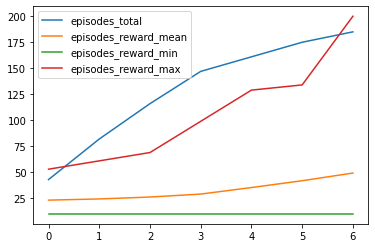

In [4]:
## create dataframe with pertinent information and graph the episode reward mean against the episode  per iteration

#episode_reward_mean = df['episode_reward_mean']
episodes_this_iter = df['episodes_this_iter']
episodes_total = df['episodes_total']
episodes_reward_mean = df['evaluation/episode_reward_mean']
episodes_reward_max = df['evaluation/episode_reward_max']
episodes_reward_min = df['evaluation/episode_reward_min']

df_episodes = pd.DataFrame(episodes_total)
df_episodes['episodes_reward_mean'] = df['episode_reward_mean']
df_episodes["episodes_reward_min"] = df['episode_reward_min']
df_episodes["episodes_reward_max"] = df['episode_reward_max']

df_episodes.plot.line()

## here we see the total number of episodes has increased overall but in each iteration, fewer episodes are required 
## to achieve a higher reward.  We see the algorithm learning more quickly towards the end when it reaches its maximum
## iterations and thus its best rewards.

In [5]:
policy = trainer.get_policy()
model = policy.model
print(model.base_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observations (InputLayer)       [(None, 4)]          0                                            
__________________________________________________________________________________________________
fc_1 (Dense)                    (None, 256)          1280        observations[0][0]               
__________________________________________________________________________________________________
fc_out (Dense)                  (None, 256)          65792       fc_1[0][0]                       
__________________________________________________________________________________________________
value_out (Dense)               (None, 1)            257         fc_1[0][0]                       
Total params: 67,329
Trainable params: 67,329
Non-trainable params: 0
________________________

### Creating a Custom Environment and Optimized Hyperparameters

lorum ipsum

In [6]:
### Creating a custom environment; adapted from Ray documentation

"""Example of a custom gym environment and model. Run this for a demo.

This example shows:
  - using a custom environment
  - using a custom model
  - using Tune for grid search

You can visualize experiment results in ~/ray_results using TensorBoard.
"""
import argparse
import gym
from gym.spaces import Discrete, Box
import numpy as np
import os
import random

import ray
from ray import tune
from ray.tune import grid_search
from ray.rllib.env.env_context import EnvContext
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.models.tf.fcnet import FullyConnectedNetwork
from ray.rllib.models.torch.torch_modelv2 import TorchModelV2
from ray.rllib.models.torch.fcnet import FullyConnectedNetwork as TorchFC
from ray.rllib.utils.framework import try_import_tf, try_import_torch
from ray.rllib.utils.test_utils import check_learning_achieved

torch, nn = try_import_torch()
run = 'DQN'
framework = 'torch'
as_test="store_true"
stop_iters = 50
stop_timesteps = 100000
stop_reward = 0.1

class SimpleCorridor(gym.Env):
    """Example of a custom env in which you have to walk down a corridor.

    You can configure the length of the corridor via the env config."""

    def __init__(self, config: EnvContext):
        self.end_pos = config["corridor_length"]
        self.cur_pos = 0
        self.action_space = Discrete(2)
        self.observation_space = Box(
            0.0, self.end_pos, shape=(1, ), dtype=np.float32)
        # Set the seed. This is only used for the final (reach goal) reward.
        self.seed(config.worker_index * config.num_workers)

    def reset(self):
        self.cur_pos = 0
        return [self.cur_pos]

    def step(self, action):
        assert action in [0, 1], action
        if action == 0 and self.cur_pos > 0:
            self.cur_pos -= 1
        elif action == 1:
            self.cur_pos += 1
        done = self.cur_pos >= self.end_pos
        # Produce a random reward when we reach the goal.
        return [self.cur_pos], \
            random.random() * 2 if done else -0.1, done, {}

    def seed(self, seed=None):
        random.seed(seed)


class CustomModel(TFModelV2):
    """Example of a keras custom model that just delegates to an fc-net."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name):
        super(CustomModel, self).__init__(obs_space, action_space, num_outputs,
                                          model_config, name)
        self.model = FullyConnectedNetwork(obs_space, action_space,
                                           num_outputs, model_config, name)

    def forward(self, input_dict, state, seq_lens):
        return self.model.forward(input_dict, state, seq_lens)

    def value_function(self):
        return self.model.value_function()


class TorchCustomModel(TorchModelV2, nn.Module):
    """Example of a PyTorch custom model that just delegates to a fc-net."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name):
        TorchModelV2.__init__(self, obs_space, action_space, num_outputs,
                              model_config, name)
        nn.Module.__init__(self)

        self.torch_sub_model = TorchFC(obs_space, action_space, num_outputs,
                                       model_config, name)

    def forward(self, input_dict, state, seq_lens):
        input_dict["obs"] = input_dict["obs"].float()
        fc_out, _ = self.torch_sub_model(input_dict, state, seq_lens)
        return fc_out, []

    def value_function(self):
        return torch.reshape(self.torch_sub_model.value_function(), [-1])




The code below is modified from the Ray documents.  The original can be found here:

In [7]:
## run and create the environment; change to work in a notebook

import ray
from ray.tune import grid_search

#ray.init()

# Can also register the env creator function explicitly with:
# register_env("corridor", lambda config: SimpleCorridor(config))

ModelCatalog.register_custom_model(
    "my_model", TorchCustomModel
    if framework == "torch" else CustomModel)

config = {
    "env": SimpleCorridor,  # or "corridor" if registered above
    "env_config": {
        "corridor_length": 5,
    },
    # Use GPUs iff `RLLIB_NUM_GPUS` env var set to > 0.
    "num_gpus": int(os.environ.get("RLLIB_NUM_GPUS", "0")),
    "model": {
        "custom_model": "my_model",
        "vf_share_layers": True,
    },
    "lr": grid_search([1e-2, 1e-4, 1e-6]),  # try different lrs
    "num_workers": 1,  # parallelism
    "framework": framework,
}

stop = {
    "training_iteration": stop_iters,
    "timesteps_total": stop_timesteps,
    "episode_reward_mean": stop_reward,
}

results = tune.run(run, config=config, stop=stop)

if as_test:
    check_learning_achieved(results, stop_reward)
    
print("best config: ", results.get_best_config(metric = 'episode_reward_mean', mode = 'max'))

#ray.shutdown()

Trial name,status,loc,lr
DQN_SimpleCorridor_d4611_00000,PENDING,,0.01
DQN_SimpleCorridor_d4611_00001,PENDING,,0.0001
DQN_SimpleCorridor_d4611_00002,PENDING,,1e-06


2021-10-20 15:17:25,075	ERROR syncer.py:73 -- Log sync requires rsync to be installed.
(pid=1531) 2021-10-20 15:17:27,664	INFO dqn.py:141 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(pid=1531) 2021-10-20 15:17:27,664	INFO trainer.py:758 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=1530) 2021-10-20 15:17:27,675	INFO dqn.py:141 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(pid=1530) 2021-10-20 15:17:27,676	INFO trainer.py:758 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=1528) 2021-10-20 15:17:27,738	INFO dqn.py:141 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consid

Trial name,status,loc,lr
DQN_SimpleCorridor_d4611_00000,RUNNING,,0.01
DQN_SimpleCorridor_d4611_00001,RUNNING,,0.0001
DQN_SimpleCorridor_d4611_00002,RUNNING,,1e-06


(pid=1531) 2021-10-20 15:17:30,243	WARNING deprecation.py:38 -- DeprecationWarning: `ReplayBuffer(size)` has been deprecated. Use `ReplayBuffer(capacity)` instead. This will raise an error in the future!
(pid=1531) 2021-10-20 15:17:30,246	WARNING util.py:57 -- Install gputil for GPU system monitoring.
(pid=1530) 2021-10-20 15:17:30,203	WARNING deprecation.py:38 -- DeprecationWarning: `ReplayBuffer(size)` has been deprecated. Use `ReplayBuffer(capacity)` instead. This will raise an error in the future!
(pid=1530) 2021-10-20 15:17:30,206	WARNING util.py:57 -- Install gputil for GPU system monitoring.
(pid=1528) 2021-10-20 15:17:30,313	WARNING deprecation.py:38 -- DeprecationWarning: `ReplayBuffer(size)` has been deprecated. Use `ReplayBuffer(capacity)` instead. This will raise an error in the future!
(pid=1528) 2021-10-20 15:17:30,316	WARNING util.py:57 -- Install gputil for GPU system monitoring.


Result for DQN_SimpleCorridor_d4611_00001:
  agent_timesteps_total: 1000
  custom_metrics: {}
  date: 2021-10-20_15-17-32
  done: false
  episode_len_mean: 29.176470588235293
  episode_media: {}
  episode_reward_max: 1.127401990262979
  episode_reward_mean: -1.7377393533805616
  episode_reward_min: -14.898400599711488
  episodes_this_iter: 34
  episodes_total: 34
  experiment_id: ec2050c1f69849ec842acc5952b0ce0a
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 1000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0001
          grad_gnorm: 4.211525917053223
          max_q: 0.0
          mean_q: -0.2889972925186157
          min_q: -0.8655588626861572
        mean_td_error: -0.18787328898906708
        model: {}
        td_error: "[-0.7069056   0.09658475  0.09904046  0.08101392  0.09904046 -1.396606\n\
          \ -0.6829462   0.09904046 -0.7069056   0.17686296  0.

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,RUNNING,10.0.33.251:1530,0.01,1,1.89332,1000,-1.12327,1.34438,-5.94911,22.6047
DQN_SimpleCorridor_d4611_00001,RUNNING,10.0.33.251:1531,0.0001,1,1.83554,1000,-1.73774,1.1274,-14.8984,29.1765
DQN_SimpleCorridor_d4611_00002,RUNNING,10.0.33.251:1528,1e-06,1,1.81561,1000,-1.60076,1.34438,-10.6616,27.4444


Result for DQN_SimpleCorridor_d4611_00000:
  agent_timesteps_total: 2000
  custom_metrics: {}
  date: 2021-10-20_15-17-38
  done: false
  episode_len_mean: 24.036585365853657
  episode_media: {}
  episode_reward_max: 1.344377124939775
  episode_reward_mean: -1.2407014000799201
  episode_reward_min: -9.671150962321768
  episodes_this_iter: 39
  episodes_total: 82
  experiment_id: c51033ebd08941aaa937deaa8e824512
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 1504
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.01
          grad_gnorm: 0.6956409811973572
          max_q: 2.1088180541992188
          mean_q: 2.0795557498931885
          min_q: 2.013923168182373
        mean_td_error: 0.7740449905395508
        model: {}
        td_error: "[-0.1075666   0.11240399  1.9300771   0.0177356   1.8579483   1.9300771\n\
          \  0.0177356  -0.1075666  -0.2536924  -0.107

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,RUNNING,10.0.33.251:1530,0.01,2,7.93215,2000,-1.2407,1.34438,-9.67115,24.0366
DQN_SimpleCorridor_d4611_00001,RUNNING,10.0.33.251:1531,0.0001,2,7.93417,2000,-1.28208,1.36638,-14.8984,24.3951
DQN_SimpleCorridor_d4611_00002,RUNNING,10.0.33.251:1528,1e-06,2,7.91142,2000,-1.08751,1.50392,-10.6616,22.3636


Result for DQN_SimpleCorridor_d4611_00000:
  agent_timesteps_total: 3000
  custom_metrics: {}
  date: 2021-10-20_15-17-44
  done: false
  episode_len_mean: 29.5
  episode_media: {}
  episode_reward_max: 1.344377124939775
  episode_reward_mean: -1.8096768033134043
  episode_reward_min: -21.73969553842974
  episodes_this_iter: 18
  episodes_total: 100
  experiment_id: c51033ebd08941aaa937deaa8e824512
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 2512
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.01
          grad_gnorm: 0.07985950261354446
          max_q: 1.3866349458694458
          mean_q: 1.3195481300354004
          min_q: 1.2759565114974976
        mean_td_error: 0.0794672966003418
        model: {}
        td_error: "[-0.04974437  0.0242008   0.0242008   0.02524781  1.0475758   0.9215346\n\
          \ -0.0494436   0.0242008   0.0242008   0.0250901  -0.04

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,RUNNING,10.0.33.251:1530,0.01,3,14.0124,3000,-1.80968,1.34438,-21.7397,29.5
DQN_SimpleCorridor_d4611_00001,RUNNING,10.0.33.251:1531,0.0001,3,13.9905,3000,-0.886014,1.51979,-5.79608,20.08
DQN_SimpleCorridor_d4611_00002,RUNNING,10.0.33.251:1528,1e-06,3,14.0555,3000,-0.39675,1.50392,-4.01101,15.26


Result for DQN_SimpleCorridor_d4611_00000:
  agent_timesteps_total: 4000
  custom_metrics: {}
  date: 2021-10-20_15-17-50
  done: false
  episode_len_mean: 36.28
  episode_media: {}
  episode_reward_max: 1.344377124939775
  episode_reward_mean: -2.48831502876439
  episode_reward_min: -23.70278810075405
  episodes_this_iter: 14
  episodes_total: 114
  experiment_id: c51033ebd08941aaa937deaa8e824512
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 3520
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.01
          grad_gnorm: 0.01360953040421009
          max_q: 1.0786311626434326
          mean_q: 1.0733864307403564
          min_q: 1.0709255933761597
        mean_td_error: -0.0004575047641992569
        model: {}
        td_error: "[-0.01034176  0.00548303 -0.7485843  -0.01788795  1.0595075  -0.01787496\n\
          \ -0.01034176 -0.01034176  0.92947197 -0.45096982  

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,RUNNING,10.0.33.251:1530,0.01,4,20.0078,4000,-2.48832,1.34438,-23.7028,36.28
DQN_SimpleCorridor_d4611_00001,RUNNING,10.0.33.251:1531,0.0001,4,20.1158,4000,-0.341793,1.33511,-4.16117,14.06
DQN_SimpleCorridor_d4611_00002,RUNNING,10.0.33.251:1528,1e-06,3,14.0555,3000,-0.39675,1.50392,-4.01101,15.26


Result for DQN_SimpleCorridor_d4611_00002:
  agent_timesteps_total: 4000
  custom_metrics: {}
  date: 2021-10-20_15-17-50
  done: false
  episode_len_mean: 11.77
  episode_media: {}
  episode_reward_max: 1.559905771780154
  episode_reward_mean: -0.11272404693280423
  episode_reward_min: -2.905406226924266
  episodes_this_iter: 88
  episodes_total: 248
  experiment_id: 4e02c389b1074b698a957814f1dc1e0f
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 3520
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 1.0e-06
          grad_gnorm: 0.2806655764579773
          max_q: 0.6854830384254456
          mean_q: 0.3453783690929413
          min_q: 0.010297674685716629
        mean_td_error: -0.19992183148860931
        model: {}
        td_error: "[-1.049629   -1.2808924   0.32342976 -0.46979892 -0.15586552  0.12229121\n\
          \ -0.61152977 -0.46979892  0.11551744  0.06118

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,RUNNING,10.0.33.251:1530,0.01,4,20.0078,4000,-2.48832,1.34438,-23.7028,36.28
DQN_SimpleCorridor_d4611_00001,RUNNING,10.0.33.251:1531,0.0001,4,20.1158,4000,-0.341793,1.33511,-4.16117,14.06
DQN_SimpleCorridor_d4611_00002,RUNNING,10.0.33.251:1528,1e-06,4,20.1238,4000,-0.112724,1.55991,-2.90541,11.77


Result for DQN_SimpleCorridor_d4611_00002:
  agent_timesteps_total: 5000
  custom_metrics: {}
  date: 2021-10-20_15-17-56
  done: true
  episode_len_mean: 10.46
  episode_media: {}
  episode_reward_max: 1.5447075373890278
  episode_reward_mean: 0.12121424697288948
  episode_reward_min: -2.79224868424489
  episodes_this_iter: 95
  episodes_total: 343
  experiment_id: 4e02c389b1074b698a957814f1dc1e0f
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 4528
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 1.0e-06
          grad_gnorm: 0.10727444291114807
          max_q: 0.7289170622825623
          mean_q: 0.38893935084342957
          min_q: 0.01334238052368164
        mean_td_error: -0.12062804400920868
        model: {}
        td_error: "[ 0.0817014   0.11599994 -0.20470387  0.05417353 -0.2108767  -0.49174297\n\
          \  0.0817014  -0.49174297 -0.49174297  0.115999

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,RUNNING,10.0.33.251:1530,0.01,5,26.5531,5000,-0.993424,1.41845,-23.7028,20.5
DQN_SimpleCorridor_d4611_00001,TERMINATED,,0.0001,5,26.3098,5000,0.173115,1.55262,-1.70087,9.58095
DQN_SimpleCorridor_d4611_00002,TERMINATED,,1e-06,5,26.2375,5000,0.121214,1.54471,-2.79225,10.46


Result for DQN_SimpleCorridor_d4611_00000:
  agent_timesteps_total: 6000
  custom_metrics: {}
  date: 2021-10-20_15-18-02
  done: true
  episode_len_mean: 8.147540983606557
  episode_media: {}
  episode_reward_max: 1.573870675110745
  episode_reward_mean: 0.31726598087463076
  episode_reward_min: -1.5821095471002968
  episodes_this_iter: 122
  episodes_total: 322
  experiment_id: c51033ebd08941aaa937deaa8e824512
  hostname: run-6170309a3ddbad0df8b110a0-tm44l
  info:
    last_target_update_ts: 5536
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.01
          grad_gnorm: 0.007342854980379343
          max_q: 0.8405561447143555
          mean_q: 0.8152645230293274
          min_q: 0.7226741313934326
        mean_td_error: -0.044836193323135376
        model: {}
        td_error: "[ 0.6119231   0.02110988  0.06569052  0.34596154  0.06569052 -0.7745429\n\
          \  0.06569052 -0.18270826 -0.77241945

Trial name,status,loc,lr,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_SimpleCorridor_d4611_00000,TERMINATED,,0.01,6,31.8373,6000,0.317266,1.57387,-1.58211,8.14754
DQN_SimpleCorridor_d4611_00001,TERMINATED,,0.0001,5,26.3098,5000,0.173115,1.55262,-1.70087,9.58095
DQN_SimpleCorridor_d4611_00002,TERMINATED,,1e-06,5,26.2375,5000,0.121214,1.54471,-2.79225,10.46


2021-10-20 15:18:02,573	INFO tune.py:617 -- Total run time: 37.74 seconds (37.40 seconds for the tuning loop).


ok
best config:  {'env': <class '__main__.SimpleCorridor'>, 'env_config': {'corridor_length': 5}, 'num_gpus': 0, 'model': {'custom_model': 'my_model', 'vf_share_layers': True}, 'lr': 0.01, 'num_workers': 1, 'framework': 'torch'}


### Finance Example: Predicting Investing Success

### What's Next?

We have two notebooks remaining:

*Using Pytorch and Ray for a simple finance example using DQN*